# **EDA Workflow**

**Step 1 — Load & Prepare Data**

Convert DateTime to proper datetime format.Sort by time and set as index.

Check duplicates, missing timestamps, and sampling frequency.                                                                            (Answers Section 1: Time Consistency & Structure)

In [1]:
import pandas as pd


In [2]:
# Step 1 — Load & Prepare Data
file_path = "/content/Tetuan City power consumption.csv"
df = pd.read_csv(file_path)

In [3]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


(        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
 0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
 1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
 2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
 3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
 4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   
 
    diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
 0          0.119               34055.69620                16128.87538   
 1          0.085               29814.68354                19375.07599   
 2          0.100               29128.10127                19006.68693   
 3          0.096               28228.86076                18361.09422   
 4          0.085               27335.69620                17872.34043   
 
    Zone 3  Power Consumption  
 0                20240.96386  
 1            

In [4]:
# Convert DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values('DateTime')

In [5]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


(             DateTime  Temperature  Humidity  Wind Speed  \
 0 2017-01-01 00:00:00        6.559      73.8       0.083   
 1 2017-01-01 00:10:00        6.414      74.5       0.083   
 2 2017-01-01 00:20:00        6.313      74.5       0.080   
 3 2017-01-01 00:30:00        6.121      75.0       0.083   
 4 2017-01-01 00:40:00        5.921      75.7       0.081   
 
    general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
 0                  0.051          0.119               34055.69620   
 1                  0.070          0.085               29814.68354   
 2                  0.062          0.100               29128.10127   
 3                  0.091          0.096               28228.86076   
 4                  0.048          0.085               27335.69620   
 
    Zone 2  Power Consumption  Zone 3  Power Consumption  
 0                16128.87538                20240.96386  
 1                19375.07599                20131.08434  
 2                19006.68693    

In [6]:
# Set as index for time-based operations
df.set_index('DateTime', inplace=True)

In [7]:
# 1. Check for duplicates in DateTime
duplicate_count = df.index.duplicated().sum()

In [8]:
duplicate_count

np.int64(0)

In [9]:
# 2. Check for missing timestamps
# Get the full expected time range at 10-minute intervals
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='10min')
missing_timestamps = full_range.difference(df.index)

In [10]:
#Show the total count of missing time stamps
missing_timestamps.size

0

In [11]:
# 3. Check frequency consistency
time_diffs = df.index.to_series().diff().value_counts()

In [12]:
time_diffs

,count
DateTime,
0 days 00:10:00,52415


In [13]:
# Results summary
time_check_results = {
    "Duplicate Timestamps": duplicate_count,
    "Missing Timestamps Count": len(missing_timestamps),
    "Most Common Time Difference": time_diffs.index[0],
    "Time Difference Frequency": time_diffs.iloc[0]
}


In [14]:
time_check_results

{'Duplicate Timestamps': np.int64(0),
 'Missing Timestamps Count': 0,
 'Most Common Time Difference': Timedelta('0 days 00:10:00'),
 'Time Difference Frequency': np.int64(52415)}

**Step 2 — Temporal Trends & Seasonality**

Temporal Trends & Seasonality to visualize daily/weekly patterns                                                      (Answers Section 2: Temporal Trends & Seasonality)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Step 2 — Temporal Trends & Seasonality

# Extract time components
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Weekday'] = df.index.weekday  # 0 = Monday
df['Hour'] = df.index.hour
# Create a 'Weekend' column (1 for weekend, 0 for weekday)
df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [17]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                52416 non-null  float64
 1   Humidity                   52416 non-null  float64
 2   Wind Speed                 52416 non-null  float64
 3   general diffuse flows      52416 non-null  float64
 4   diffuse flows              52416 non-null  float64
 5   Zone 1 Power Consumption   52416 non-null  float64
 6   Zone 2  Power Consumption  52416 non-null  float64
 7   Zone 3  Power Consumption  52416 non-null  float64
 8   Year                       52416 non-null  int32  
 9   Month                      52416 non-null  int32  
 10  Day                        52416 non-null  int32  
 11  Weekday                    52416 non-null  int32  
 12  Hour                       52416 non-null  int32  
 13  Weekend    

(                     Temperature  Humidity  Wind Speed  general diffuse flows  \
 DateTime                                                                        
 2017-01-01 00:00:00        6.559      73.8       0.083                  0.051   
 2017-01-01 00:10:00        6.414      74.5       0.083                  0.070   
 2017-01-01 00:20:00        6.313      74.5       0.080                  0.062   
 2017-01-01 00:30:00        6.121      75.0       0.083                  0.091   
 2017-01-01 00:40:00        5.921      75.7       0.081                  0.048   
 
                      diffuse flows  Zone 1 Power Consumption  \
 DateTime                                                       
 2017-01-01 00:00:00          0.119               34055.69620   
 2017-01-01 00:10:00          0.085               29814.68354   
 2017-01-01 00:20:00          0.100               29128.10127   
 2017-01-01 00:30:00          0.096               28228.86076   
 2017-01-01 00:40:00          0.08

In [18]:
# Function to plot average daily profile
def plot_daily_profile(zone_col):
    daily_profile = df.groupby('Hour')[zone_col].mean()
    plt.figure(figsize=(10,5))
    plt.plot(daily_profile.index, daily_profile.values, marker='o')
    plt.title(f"Average Daily Power Consumption - {zone_col}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Consumption")
    plt.grid(True)
    plt.show()


In [19]:
# Function to plot weekday-hour heatmap
def plot_weekday_hour_heatmap(zone_col):
    pivot = df.pivot_table(index='Weekday', columns='Hour', values=zone_col, aggfunc='mean')
    plt.figure(figsize=(12,5))
    sns.heatmap(pivot, cmap='viridis')
    plt.title(f"Heatmap of Consumption by Weekday and Hour - {zone_col}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Weekday (0=Mon)")
    plt.show()

In [20]:
# Function to plot weekday-hour heatmap
def plot_weekend_hour_heatmap(zone_col):
    pivot = df.pivot_table(index='Weekend', columns='Hour', values=zone_col, aggfunc='mean')
    plt.figure(figsize=(12,5))
    sns.heatmap(pivot, cmap='viridis')
    plt.title(f"Heatmap of Consumption by Weekebd and Hour - {zone_col}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Weekend (6=Sat)")
    plt.show()

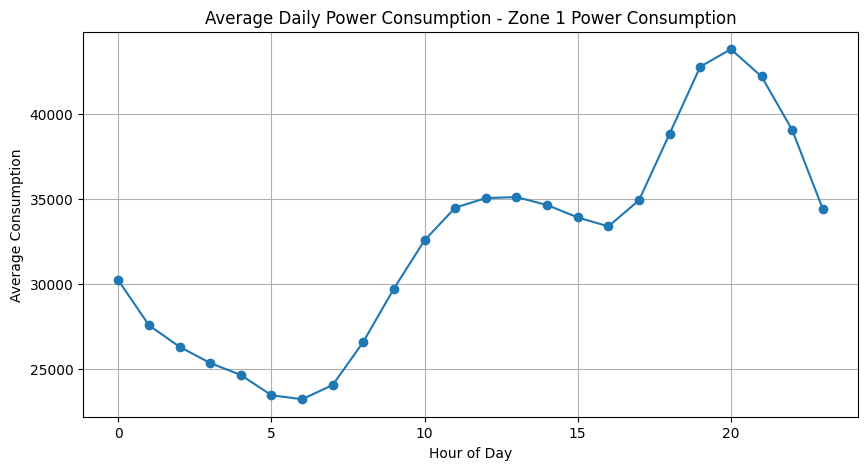

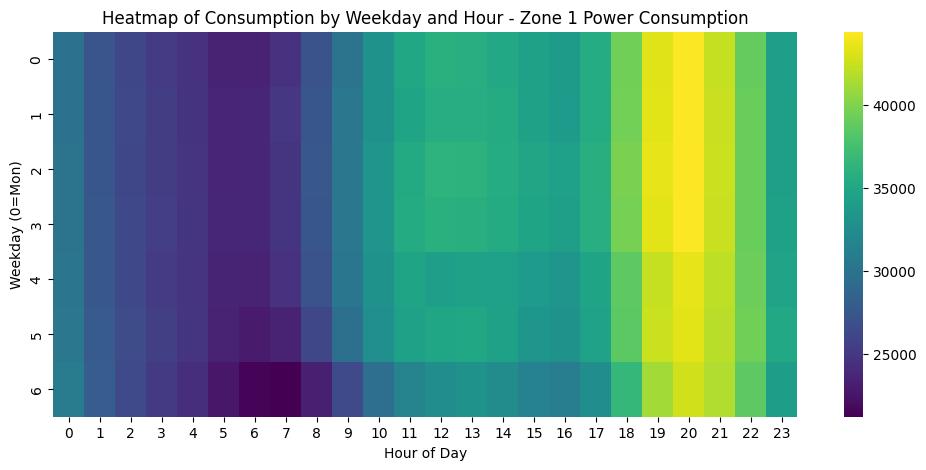

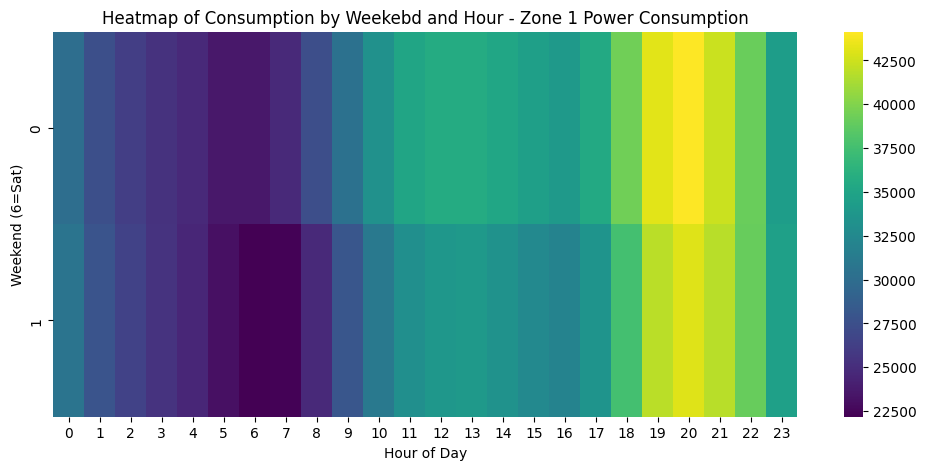

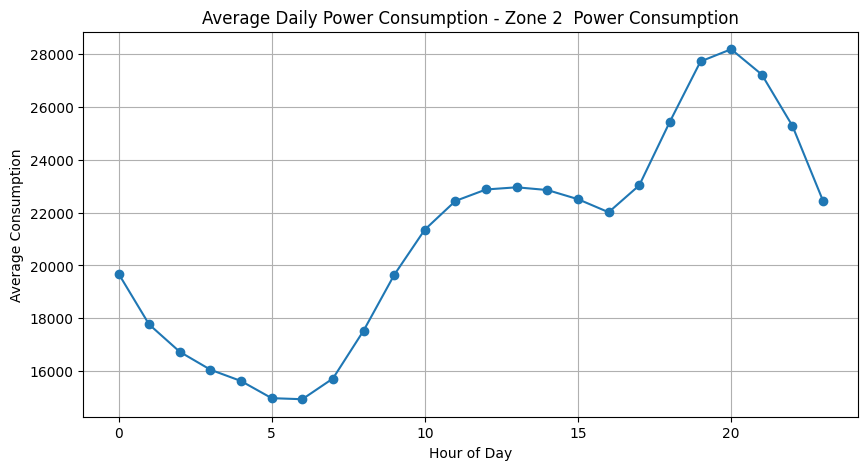

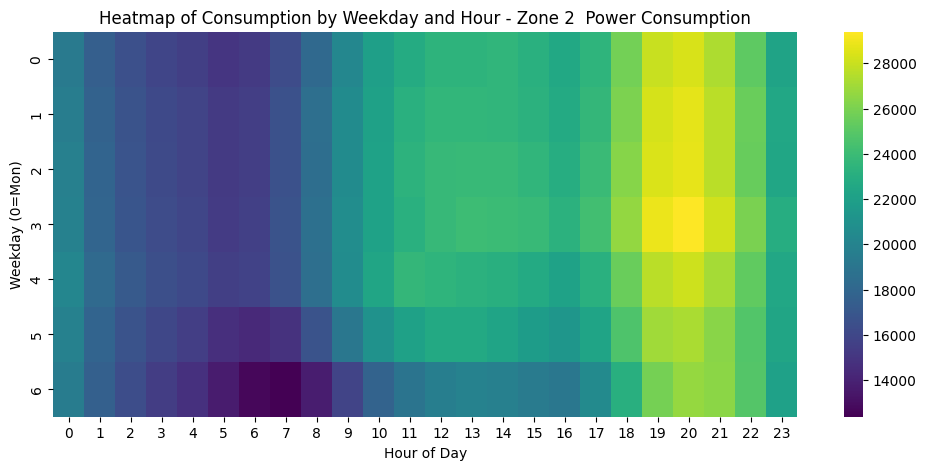

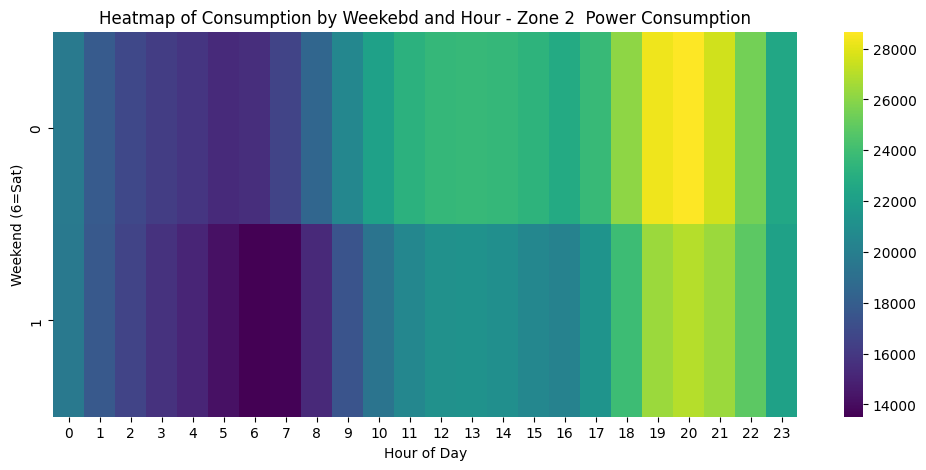

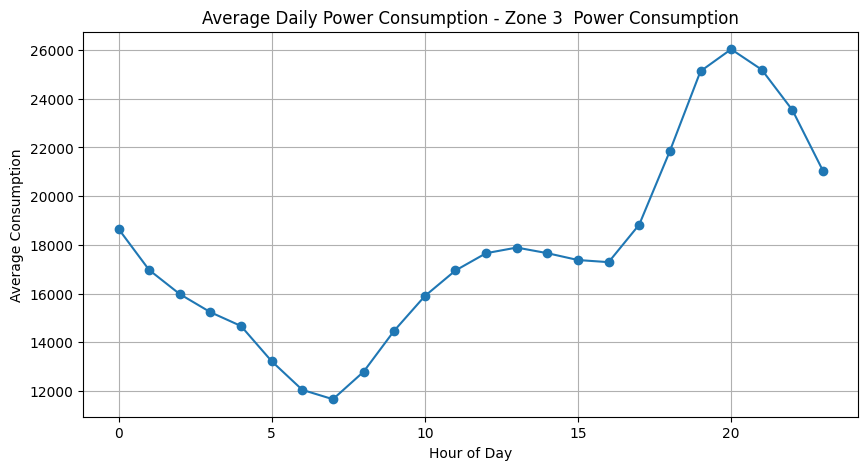

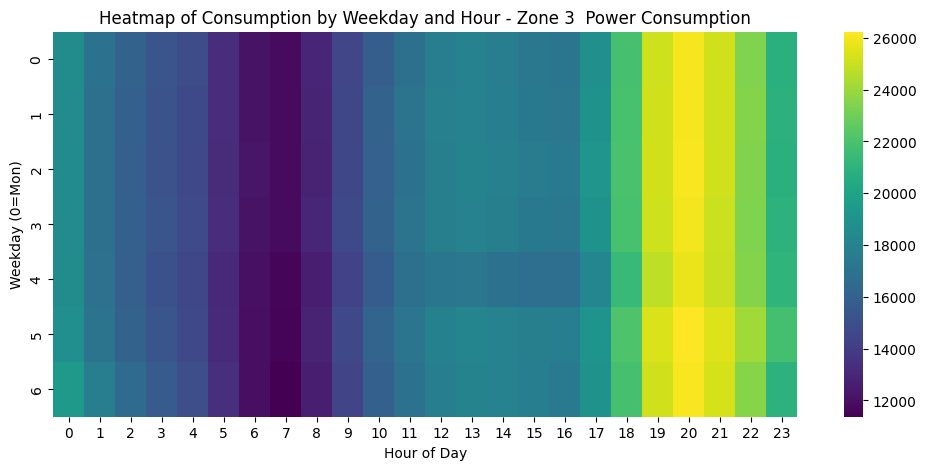

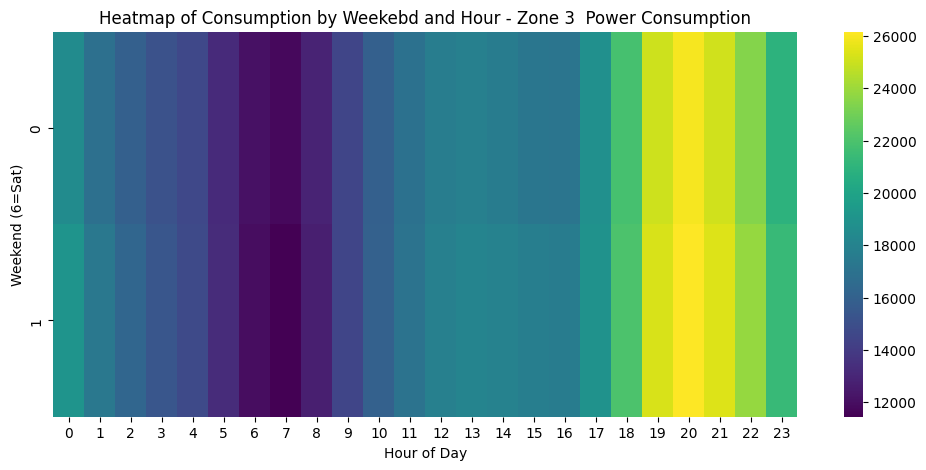

In [21]:
# Plot for each zone
for zone in ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']:
    plot_daily_profile(zone)
    plot_weekday_hour_heatmap(zone)
    plot_weekend_hour_heatmap(zone)

**Step 3 — Environmental Feature Relationships**

In [42]:
# Select the relevant columns
environmental_features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
power_consumption_zones = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
all_features = environmental_features + power_consumption_zones

In [43]:
all_features

['Temperature',
 'Humidity',
 'Wind Speed',
 'general diffuse flows',
 'diffuse flows',
 'Zone 1 Power Consumption',
 'Zone 2  Power Consumption',
 'Zone 3  Power Consumption']

In [44]:
# Calculate the correlation matrix for the entire DataFrame
full_correlation_matrix = df.corr(numeric_only=True)

# Select the relevant correlations
correlation_matrix = full_correlation_matrix.loc[environmental_features, power_consumption_zones]

In [45]:
# Display the correlations of environmental features with power consumption zones
print(correlation_matrix.loc[environmental_features, power_consumption_zones])

                       Zone 1 Power Consumption  Zone 2  Power Consumption  \
Temperature                            0.440221                   0.382428   
Humidity                              -0.287421                  -0.294961   
Wind Speed                             0.167444                   0.146413   
general diffuse flows                  0.187965                   0.157223   
diffuse flows                          0.080274                   0.044667   

                       Zone 3  Power Consumption  
Temperature                             0.489527  
Humidity                               -0.233022  
Wind Speed                              0.278641  
general diffuse flows                   0.063376  
diffuse flows                          -0.038506  


**Step 4. Lag Effects & Time Dependency**

To analyze lagged effects, you can shift the environmental data backward in time and then calculate the correlation with the current power consumption data. The dataset has 10-minute intervals.

In [47]:
# Create a new DataFrame for lagged analysis
lagged_df = df.copy()

# Define lag intervals in 10-minute steps
lags = [1, 6, 12]  # Represents 10 minutes, 1 hour, and 2 hours

for lag in lags:
    for feature in environmental_features:
        # Shift the environmental feature data by 'lag' intervals
        lagged_df[f'{feature}_lag_{lag*10}min'] = lagged_df[feature].shift(lag)

# Calculate correlations of lagged features with power consumption
lag_correlation = lagged_df[[col for col in lagged_df.columns if 'lag' in col] + power_consumption_zones].corr()

# Display the correlations
#print(lag_correlation)

In [49]:
 # Get the correlation values between lagged features and power consumption zones
 correlation_map_data = lag_correlation.loc[[col for col in lagged_df.columns if 'lag' in col], power_consumption_zones]

Lagged correlation map saved as 'lagged_correlation_map.png'


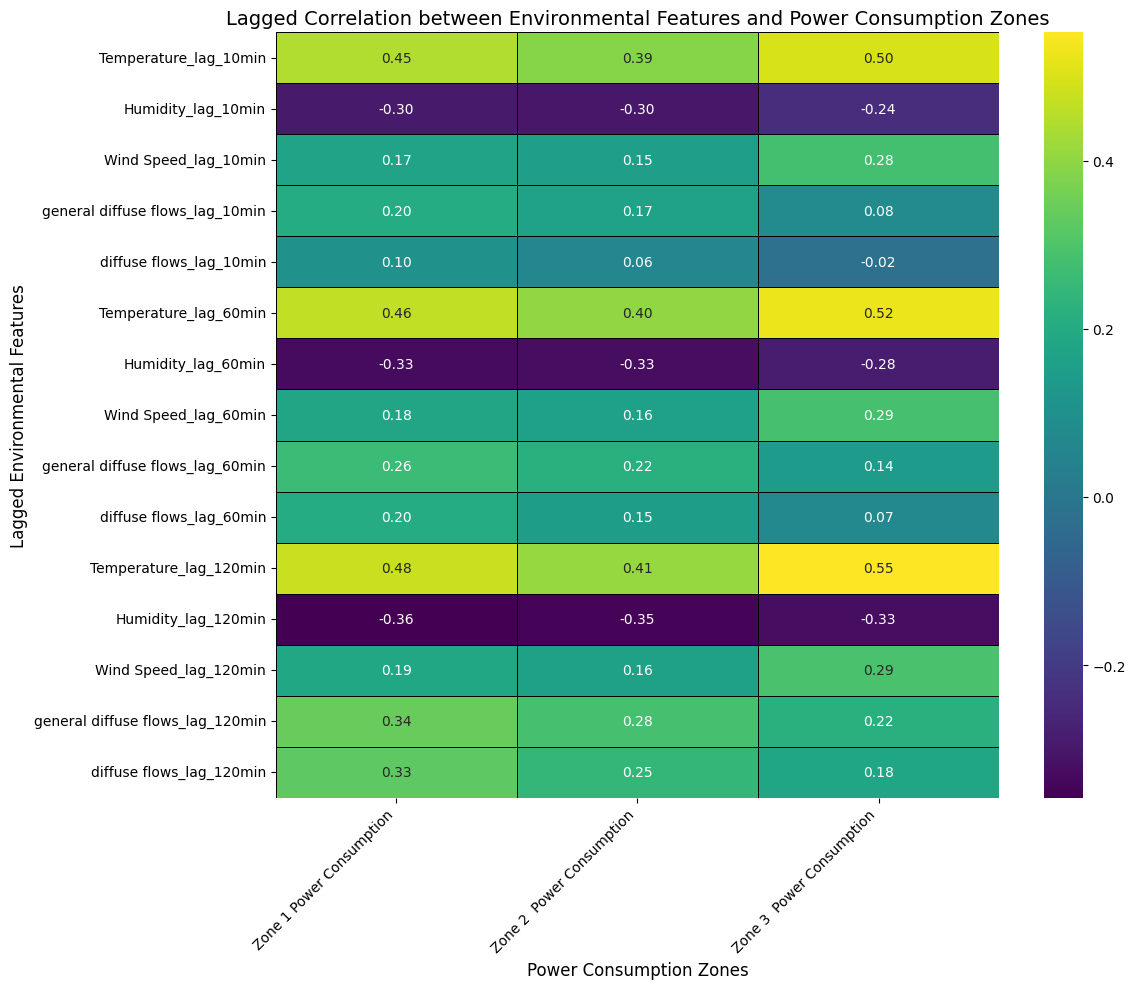

In [51]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_map_data, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Lagged Correlation between Environmental Features and Power Consumption Zones', fontsize=14)
plt.xlabel('Power Consumption Zones', fontsize=12)
plt.ylabel('Lagged Environmental Features', fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('lagged_correlation_map.png')

print("Lagged correlation map saved as 'lagged_correlation_map.png'")

**5. Data Quality & Sensor Anomalies**

Generating box plots to visually identify outliers...


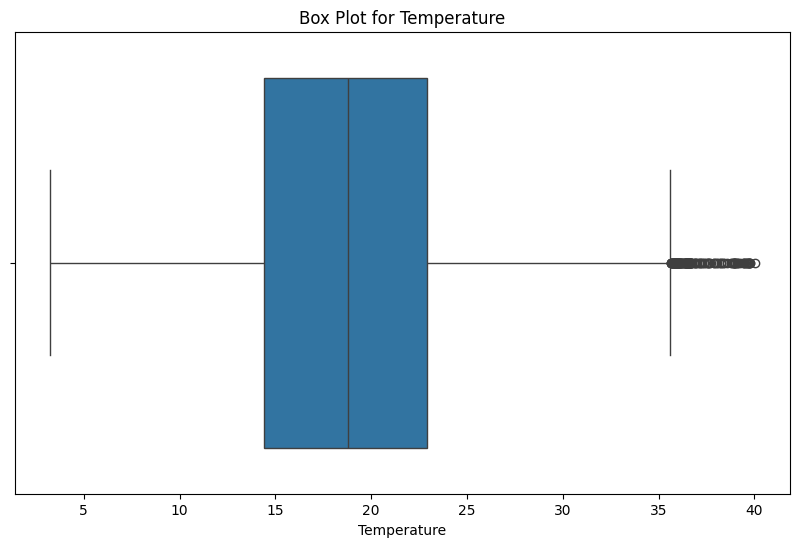

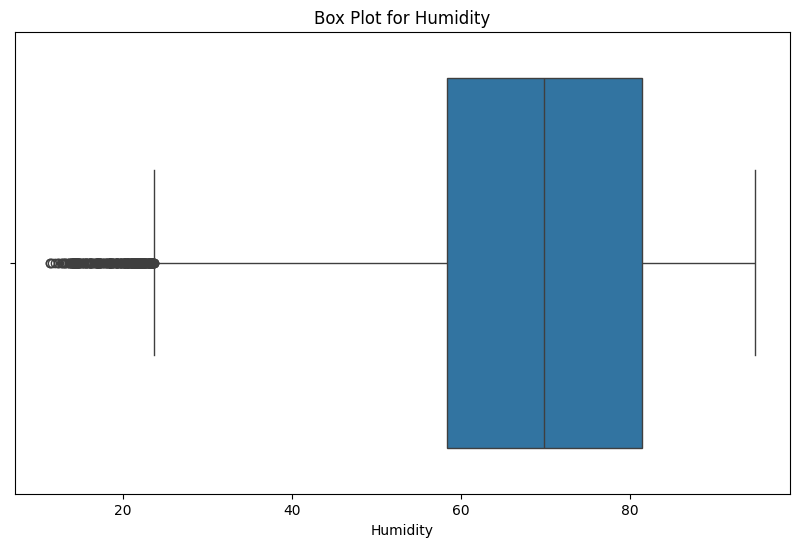

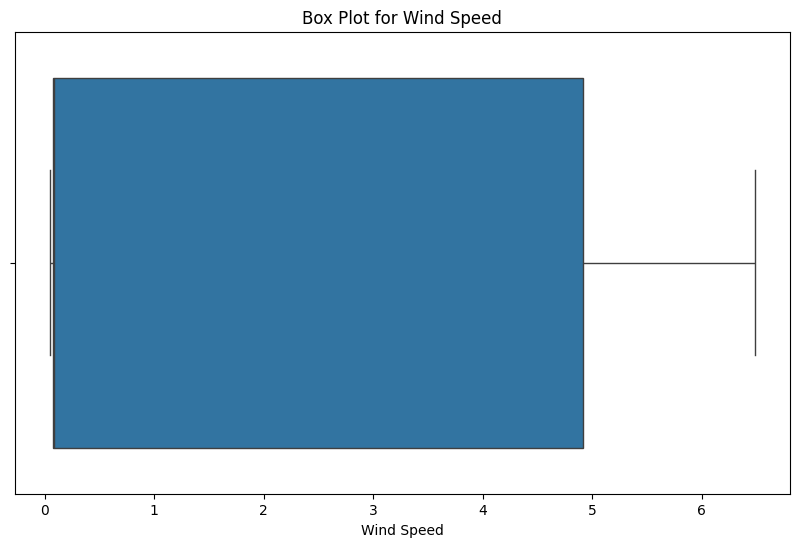

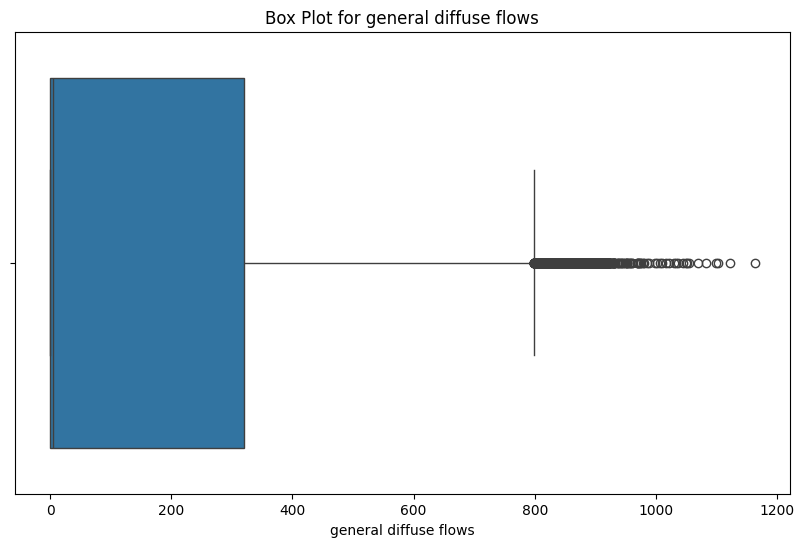

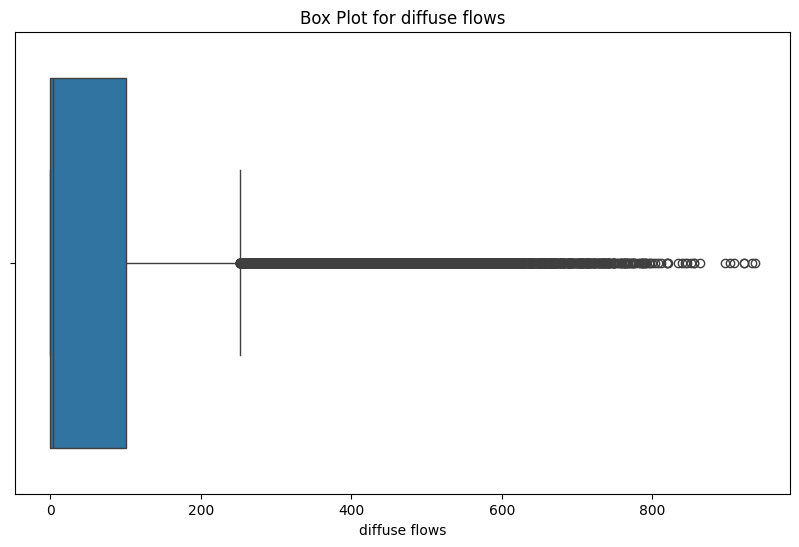

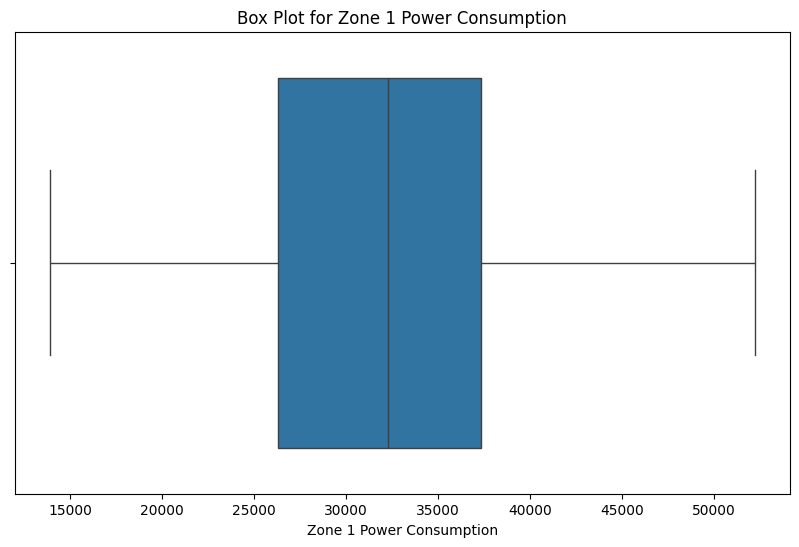

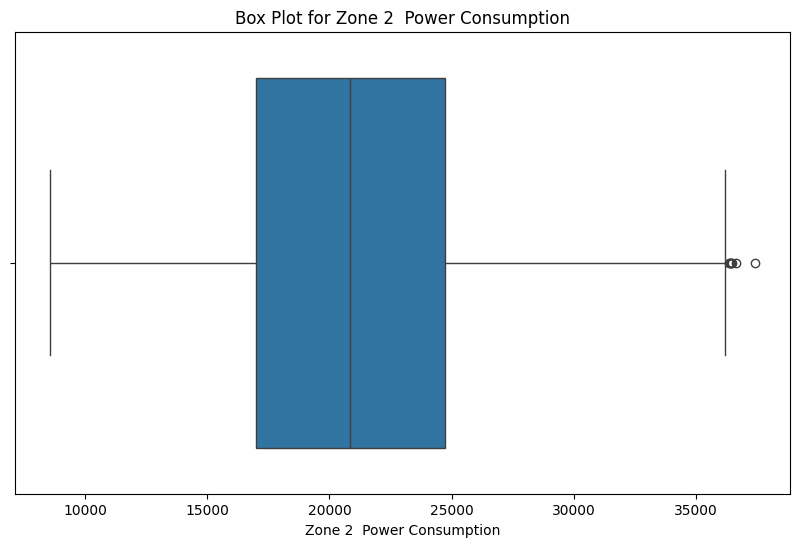

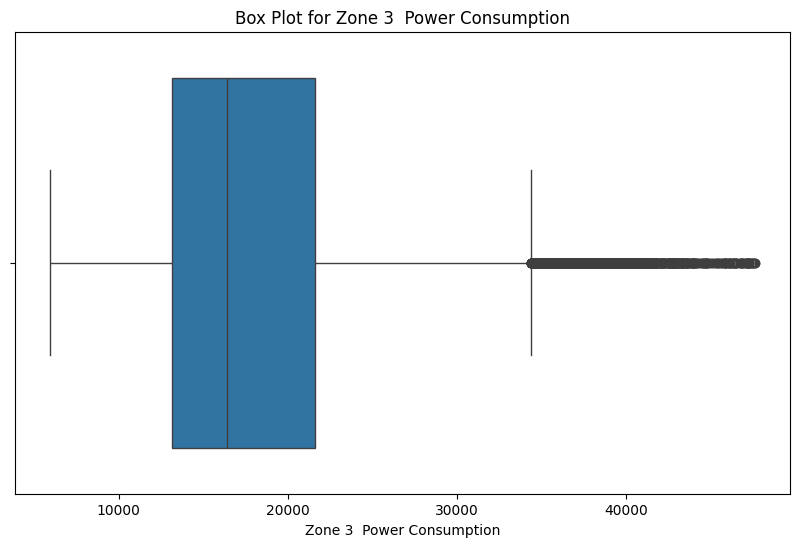

In [53]:
# --- Visual Method: Box plots ---
print("Generating box plots to visually identify outliers...")
for col in all_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot for {col}')
        plt.xlabel(col)
        plt.show()


In [ ]:
# --- Statistical Method: Interquartile Range (IQR) ---
print("\nDetecting outliers using the Interquartile Range (IQR) method...")

def find_outliers_iqr(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return outliers

for col in all_features:
        outliers = find_outliers_iqr(df[col])
        if not outliers.empty:
            print(f"\n--- Outliers found in {col} ---")
            print(outliers)
        else:
            print(f"\n--- No significant outliers found in {col} ---")

Generating box plots to visually identify the interquartile range and outliers...


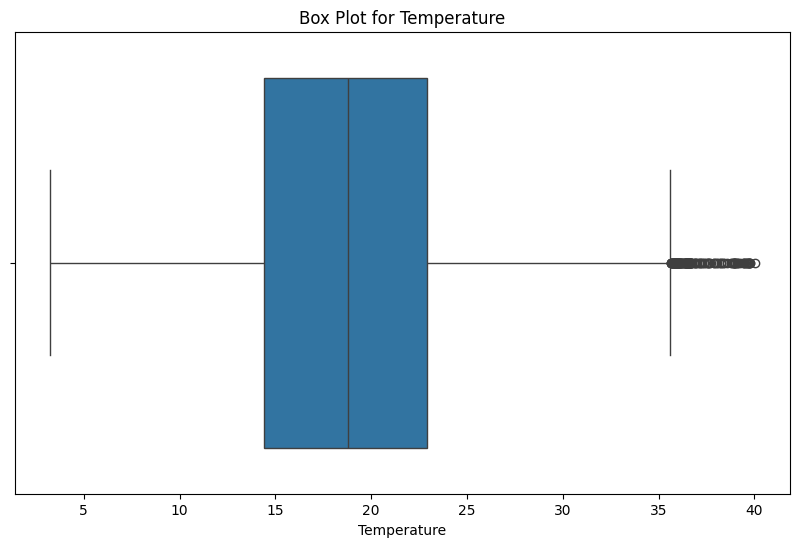

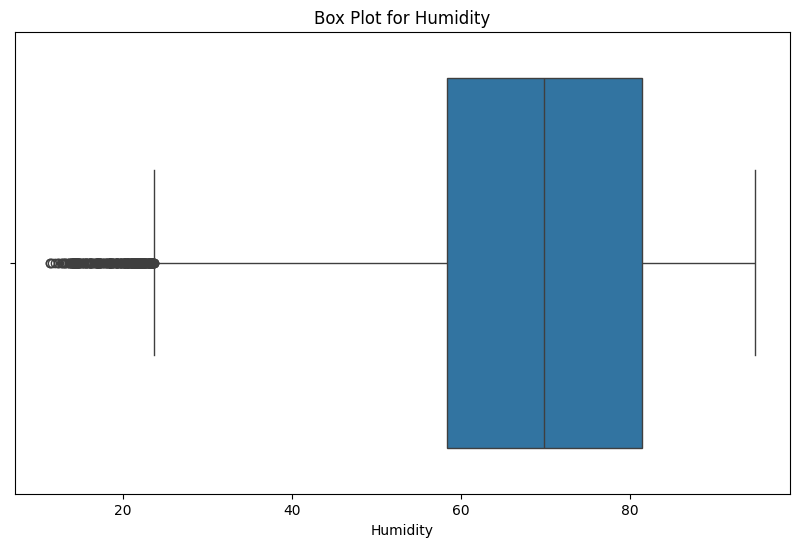

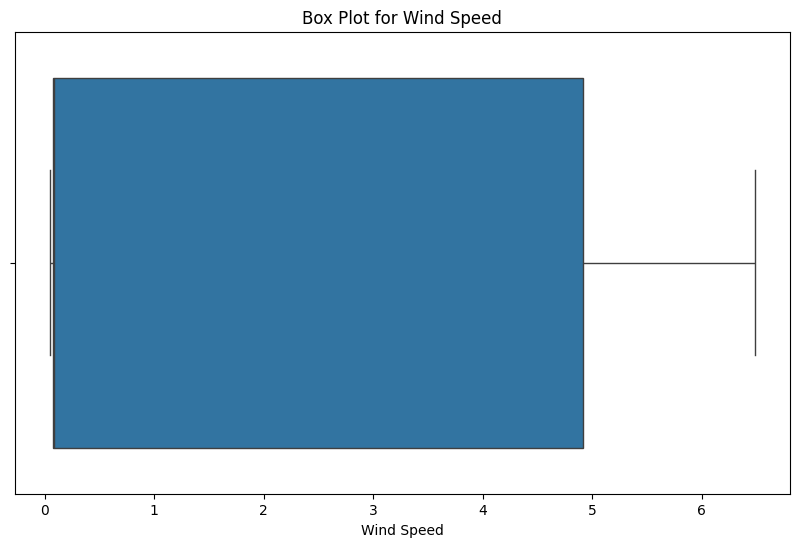

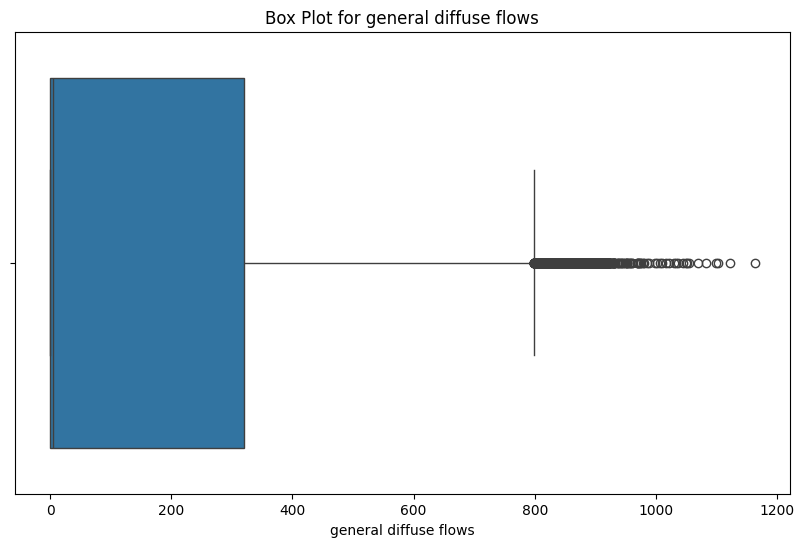

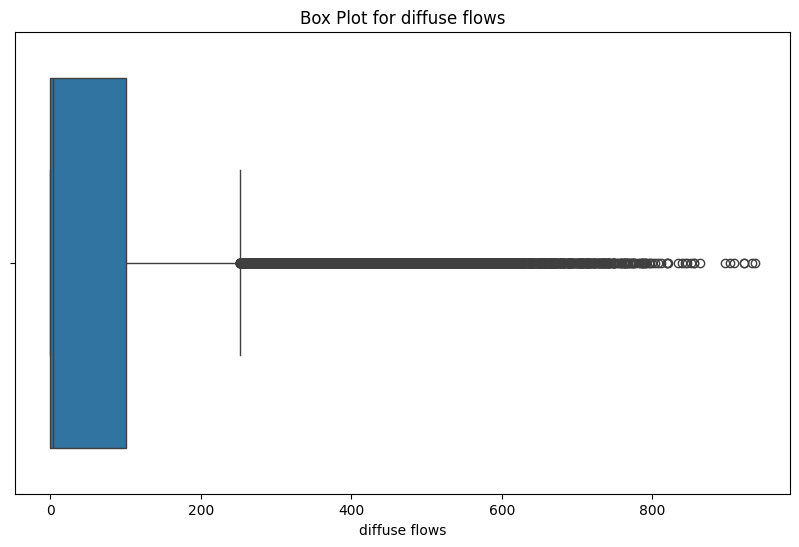

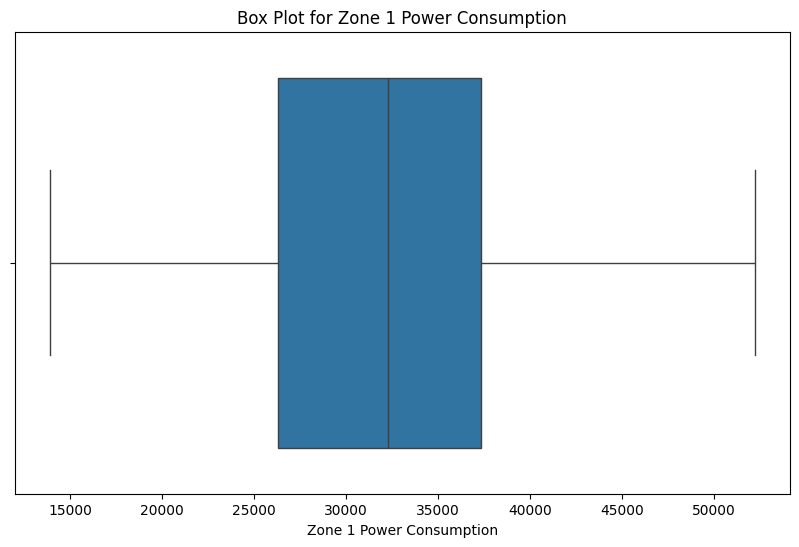

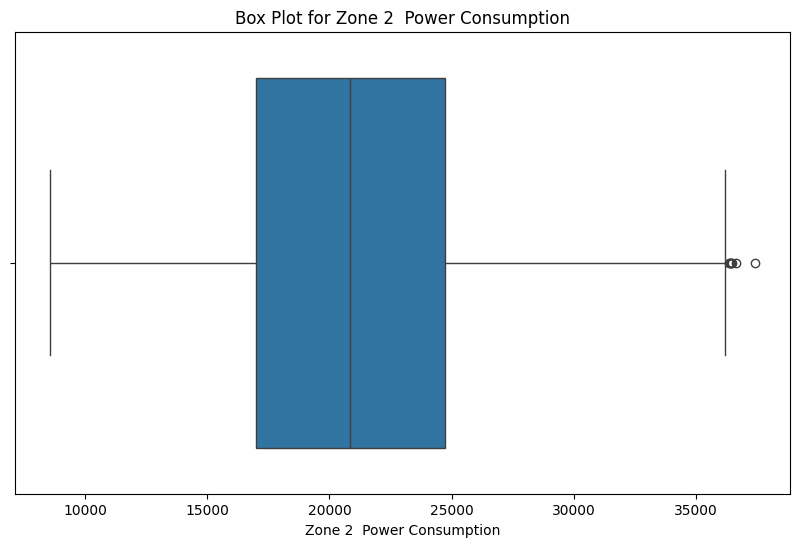

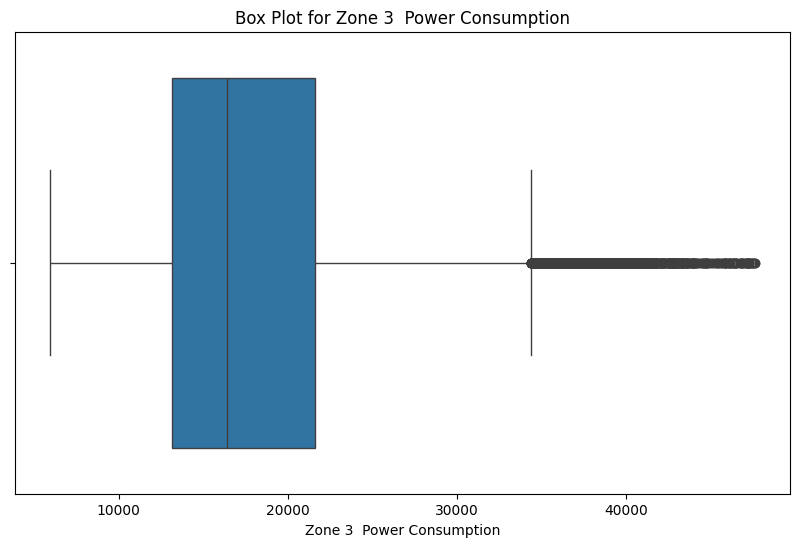

Box plots have been saved as PNG files for each feature.


In [58]:
# --- Visual Method: Box plots ---
print("Generating box plots to visually identify the interquartile range and outliers...")
for col in all_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot for {col}')
        plt.xlabel(col)
        plt.savefig(f'boxplot_{col.replace(" ", "_")}.png')
        plt.show()

print("Box plots have been saved as PNG files for each feature.")

|                                                                                                                     Week 1: Setup & Exploratory Data Analysis (EDA)
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 🧭 **1. Time Consistency & Structure**                                                                                                                                  |
| **Q: Are there any missing or irregular timestamps in the dataset? How did you verify consistency?**                                                                    |
| **A:** No, there are no missing timestamps in the dataset. Consistency was verified by generating a complete expected time range at a 10-minute frequency and comparing it to the actual timestamps in the DataFrame's index. The count of missing timestamps was 0. |
| **Q: What is the sampling frequency and are all records spaced consistently?**                                                                                           |
| **A:** The sampling frequency is 10 minutes. All records are spaced consistently at this interval, as verified by calculating the time differences between consecutive timestamps and observing that the only difference present was 10 minutes. |
| **Q: Did you encounter any duplicates or inconsistent DateTime entries?**                                                                                               |
| **A:** No, there were no duplicate or inconsistent DateTime entries. This was verified by checking for duplicate values in the DataFrame's index, which resulted in a count of 0. |
| 📊 **2. Temporal Trends & Seasonality**                                                                                                                                   |
| **Q: What daily or weekly patterns are observable in power consumption across the three zones?**                                                                           |
| **A:** Clear daily patterns were observed across all zones, with lower consumption in the early morning, increasing during the day, and peaking in the evening (6 PM - 9 PM). Weekly patterns showed higher consumption during weekday work hours compared to weekends. Weekend mornings had a later ramp-up in consumption. |
| **Q: Are there seasonal or time-of-day peaks and dips in energy usage?**                                                                                                  |
| **A:** Yes, distinct time-of-day peaks were observed in the evening (6 PM - 9 PM) and dips in the early morning (3 AM - 6 AM). While not explicitly visualized as seasonal plots, the analysis across a year of data implicitly includes seasonal influences on these patterns. |
| **Q: Which visualizations helped you uncover these patterns?**                                                                                                             |
| **A:** The Average Daily Power Consumption Line Plots clearly showed the 24-hour cycle and time-of-day peaks/dips. The Heatmap of Consumption by Weekday and Hour (and Weekend and Hour) revealed the differences in consumption patterns between weekdays and weekends. |
| 🌦️ **3. Environmental Feature Relationships**                                                                                                                            |
| **Q: Which environmental variables (temperature, humidity, wind speed, solar radiation) correlate most with energy usage?**                                                |
| **A:** Temperature showed the strongest positive correlation with power consumption across all zones (0.38 - 0.49). Wind Speed had a weak positive correlation (0.14 - 0.27). General diffuse flows showed weak positive correlations, while diffuse flows had very weak positive or negative correlations depending on the zone. |
| **Q: Are any variables inversely correlated with demand in specific zones?**                                                                                               |
| **A:** Yes, Humidity was inversely correlated with power consumption in all three zones (-0.23 to -0.29). Diffuse flows also showed a weak inverse correlation with Zone 3 (-0.038). |
| **Q: Did your analysis differ across zones? Why might that be?**                                                                                                           |
| **A:** Yes, the strength of correlations varied across zones (e.g., Temperature correlation was slightly stronger in Zone 3, Wind Speed correlation was notably stronger in Zone 3). This could be due to differences in building types, activities, HVAC systems, or localized environmental conditions within each zone. |
| 🌀 **4. Lag Effects & Time Dependency**                                                                                                                                    |
| **Q: Did you observe any lagged effects where past weather conditions predict current power usage?**                                                                       |
| **A:** Yes, lagged effects were observed, indicated by correlations between past environmental conditions and current power usage. |
| **Q: How did you analyze lag (e.g., shifting features, plotting lag correlation)?**                                                                                         |
| **A:** Lag was analyzed by shifting environmental features backward in time (by 10, 60, and 120 minutes), calculating the correlation of these lagged features with current power consumption, and visualizing the results using a heatmap. |
| **Q: What lag intervals appeared most relevant and why?**                                                                                                                 |
| **A:** Longer lag intervals (60 and 120 minutes) appeared slightly more relevant for some features (like Temperature and Humidity) as the correlations were generally stronger compared to the 10-minute lag. This suggests a delayed impact of these environmental changes on power consumption. |
| ⚠️ **5. Data Quality & Sensor Anomalies**                                                                                                                                 |
| **Q: Did you detect any outliers in the weather or consumption readings?**                                                                                                 |
| **A:** Yes, outliers were detected in several weather and power consumption readings using both box plots and the IQR statistical method. |
| **Q: How did you identify and treat these anomalies?**                                                                                                                    |
| **A:** Outliers were identified visually using box plots and statistically using the IQR method (values outside 1.5 * IQR from Q1 and Q3). In this EDA phase, anomalies were identified but not yet treated. |
| **Q: What might be the impact of retaining or removing them in your model?**                                                                                              |
| **A:** Retaining outliers can skew statistical measures and negatively impact outlier-sensitive models, though they might represent real events. Removing them can improve model performance for sensitive models but may lead to loss of information or distort the data distribution if not done carefully. |

**Summary of Key Findings:**

*   The dataset has good time consistency with no missing or duplicate timestamps and a consistent 10-minute sampling frequency.
*   Power consumption across all zones exhibits clear daily and weekly patterns, with peak usage in the evening and differences between weekday and weekend consumption.
*   Temperature has the strongest positive correlation with power consumption, while Humidity has an inverse correlation. Wind Speed and solar radiation variables show weaker correlations.
*   Lag effects are present, with past environmental conditions (especially Temperature and Humidity) showing increasing correlation with current power consumption at longer lag intervals.
*   Outliers were detected in several features, highlighting the need for careful consideration of their treatment during the modeling phase.